# Use Clustering Techniques for the any customer dataset using machine learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv(r'D:\InternSavy\archive\Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.rename(columns={'Genre':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [5]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().values.any()

False

In [8]:
df.duplicated().sum()

0

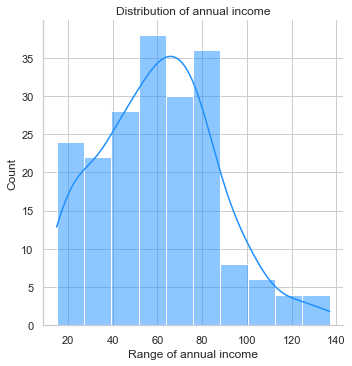

In [11]:
# Distribution of Annual Income
sns.set(style = 'whitegrid')
sns.displot(df['income'], kde = True, color = 'dodgerblue')
plt.title("Distribution of annual income")
plt.xlabel("Range of annual income")
plt.ylabel("Count")

plt.show()

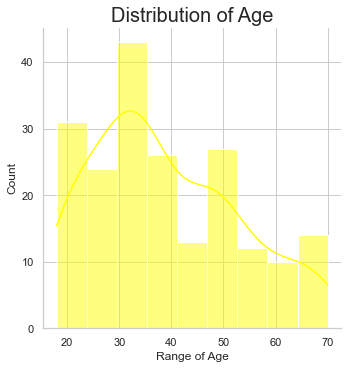

In [12]:
# distribution of Age
sns.set(style="whitegrid")
sns.displot(df["age"], kde=True, color="yellow")

plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.show()

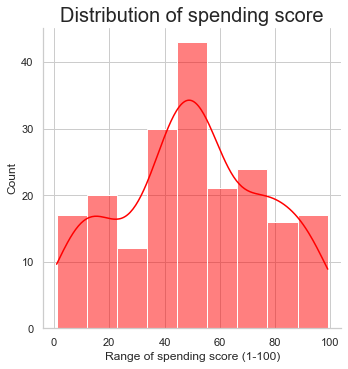

In [13]:
# distribution of spending score
sns.set(style="whitegrid")
sns.displot(df["score"], kde=True, color="red")

plt.title('Distribution of spending score', fontsize = 20)
plt.xlabel('Range of spending score (1-100)')
plt.ylabel('Count')

plt.show()

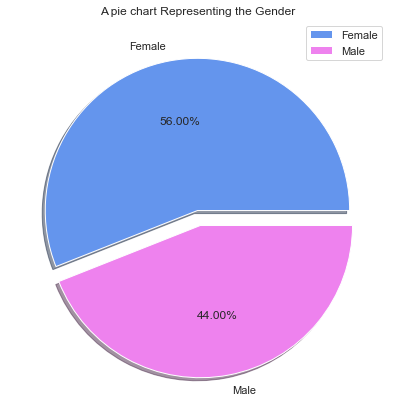

In [14]:
labels = ['Female', 'Male']
size = [112, 88]
colors = ['cornflowerblue', 'violet']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the Gender')
plt.axis('off')
plt.legend()
plt.show()

<Figure size 360x360 with 0 Axes>

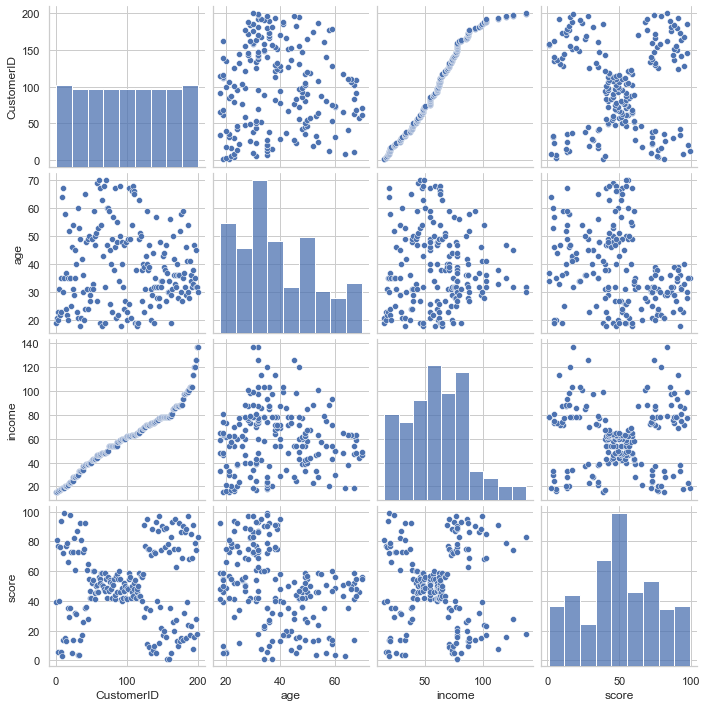

In [15]:
plt.figure(figsize = (5,5))
sns.pairplot(df, palette = 'hls')
plt.show()

In [22]:
x=df.iloc[:,2:4]
x

,age,income
0,19,0.000000
1,21,0.000000
2,20,0.008197
3,23,0.008197
4,31,0.016393
...,...,...
195,35,0.860656
196,45,0.909836
197,32,0.909836
198,32,1.000000


In [23]:
y=df.score
y

0      0.387755
1      0.816327
2      0.051020
3      0.775510
4      0.397959
         ...   
195    0.795918
196    0.275510
197    0.744898
198    0.173469
199    0.836735
Name: score, Length: 200, dtype: float64

In [24]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(df[['age','score']])
kmeans.cluster_centers_

array([[29.54032258,  0.58969717],
       [54.03947368,  0.35902256]])

In [25]:
df['age_cluster']=kmeans.labels_
df

,CustomerID,gender,age,income,score,age_cluster
0,1,Male,19,0.000000,0.387755,0
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,0
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,0
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,0
196,197,Female,45,0.909836,0.275510,1
197,198,Male,32,0.909836,0.744898,0
198,199,Male,32,1.000000,0.173469,0


In [26]:
df['age_cluster'].value_counts()

age_cluster
0    124
1     76
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='score'>

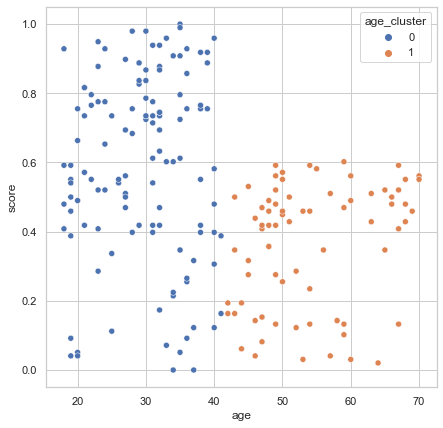

In [28]:
sns.scatterplot(x='age',y='score',hue='age_cluster',data=df)

In [29]:
kmeans2=KMeans(n_clusters=5)
kmeans2.fit(df[['income','score']])
kmeans2.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

In [30]:
df['income_cluster']=kmeans2.labels_
df

,CustomerID,gender,age,income,score,age_cluster,income_cluster
0,1,Male,19,0.000000,0.387755,0,4
1,2,Male,21,0.000000,0.816327,0,2
2,3,Female,20,0.008197,0.051020,0,4
3,4,Female,23,0.008197,0.775510,0,2
4,5,Female,31,0.016393,0.397959,0,4
...,...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,0,3
196,197,Female,45,0.909836,0.275510,1,1
197,198,Male,32,0.909836,0.744898,0,3
198,199,Male,32,1.000000,0.173469,0,1


In [31]:
df['income_cluster'].value_counts()

income_cluster
0    81
3    39
1    35
4    23
2    22
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='score'>

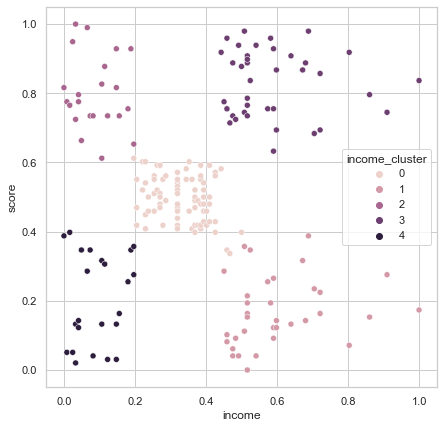

In [32]:
sns.scatterplot(x='income',y='score',hue='income_cluster',data=df)